# D22027_Loan Status Prediction

Submitted by

**D22002-Agasthyakrishna Viswanathan Panicker**

**D22027-N.Maheshkumar**

**Problem Statement:** This is a classification problem in which we need to classify whether the loan will be approved or not.This is a Binary Classification problem in which we need to predict our Target label which is “Loan Status”.

# PPP - Loan Data

In [1]:
# Import Required Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv("Loans_Training_Set.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Loans_Training_Set.csv'

In [ ]:
data = df.copy()

In [ ]:
#no of rows and columns
data.shape

In [ ]:
#Checking the datatypes
data.dtypes

In [ ]:
#Check For duplicates
data[data.duplicated('Customer ID')]

In [ ]:
# dropping ALL duplicate values
data.drop_duplicates(subset="Customer ID",inplace=True)

In [ ]:
len(data)

In [ ]:
# count duplicate values in courses column
df2 = len(data['Loan ID'])-len(data['Loan ID'].drop_duplicates())
print(df2)

In [ ]:
# Checking No of Null values in each feature
data.isnull().sum()

In [ ]:
#Dropping the unnecessary Columns
data=data.drop(["Loan ID","Customer ID"],axis=1)

In [ ]:
data

In [ ]:
data.describe()

In [ ]:
# Getting the proportion of null values in each column
(data.isnull().sum()*100)/len(data)

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
#Finding Missing Value Percentage
missing_values_table(data)

In [ ]:
data.shape #Shape of the data

# Data Cleaning & Pre-Processing

**1. Loan Status** - A categorical variable indicating if the loan was paid back or defaulted.

In [ ]:
plt.pie(data[['Loan Status']].value_counts(),labels =['Fully Paid', 'Charged Off'],explode = (0.2,0))
plt.show()

In [ ]:
# Frequency Distribution
table = pd.crosstab(data["Loan Status"],columns="Loan Status")
table["Percentage"] = pd.crosstab(data["Loan Status"],columns="Term",normalize=True)*100
table
# Observation : Nearly 72% of the observations belongs to target class 'Fully Paid' whereas nearly 28% belongs to 'Charged Off'

--------------------------------------------------------------------------------------------------------------------------------

**2. Current Loan Amount** - This is the loan amount that was either completely paid off, or the amount that was defaulted.

In [ ]:
data["Current Loan Amount"].value_counts

In [ ]:
#data[data["Current Loan Amount"] == 99999999]

In [ ]:
# # Replacing every instance of 'HaveMortgage' with 'Home Mortgage'
# data['Current Loan Amount'] = data['Current Loan Amount'].apply(lambda x: np.nan if x== 99999999 else x)

In [ ]:
# data['Current Loan Amount'].isnull().sum()

In [ ]:
#The Null values will be imputed with k-NN imputer later

--------------------------------------------------------------------------------------------------------------------------------

**3. Term** - A categorical variable indicating if it is a short term or long term loan.

In [ ]:
# Frequency Distribution
table = pd.crosstab(data["Term"],columns="Term")
table["Percentage"] = pd.crosstab(data["Term"],columns="Term",normalize=True)*100
table

In [ ]:
# #Mapping 1 to long term and 0 to short term
data['Term'] = data['Term'].map({'Long Term':1,'Short Term':0})

In [ ]:
data['Term'].value_counts()

--------------------------------------------------------------------------------------------------------------------------------

**4. Credit Score** - A value between 0 and 800 indicating the riskiness of the borrowers credit history.

In [ ]:
data["Credit Score"].value_counts

In [ ]:
# The credit score as specified in the data dictionary are in the range of 0 to 800. but some of the values are in range of 7000
data['Credit Score'] = data['Credit Score'].apply(lambda x: x/10 if x>800 else x)

In [ ]:
data["Credit Score"].value_counts

--------------------------------------------------------------------------------------------------------------------------------

**5.Years in current job** - A categorical variable indicating how many years the customer has been in their current job.

In [ ]:
# Frequency Distribution
table = pd.crosstab(data["Years in current job"],columns="Years in current job")
table["Percentage"] = pd.crosstab(data["Years in current job"],columns="Years in current job",normalize=True)*100
table

In [ ]:
data["Years in current job"].isnull().sum()

In [ ]:
# Determining the conditional mode for Years in current job column
print(data[data['Loan Status']=='Fully Paid']['Years in current job'].mode())
print(data[data['Loan Status']=='Charged Off']['Years in current job'].mode())

In [ ]:
# Filling the missing values with the mode since it's a categorical column
data['Years in current job'].fillna(value='10+ years',inplace=True)

In [ ]:
data["Years in current job"].isnull().sum()

In [ ]:
#Label encoding 
data["Years in current job"]= data["Years in current job"].replace({"< 1 year":0,"1 year":1,"2 years":2,"3 years":3,
                                                                      "4 years":4,"5 years":5,"6 years":6,"7 years":7,
                                                                      "8 years":8,"9 years":9,"10+ years":10})

In [ ]:
data["Years in current job"]

--------------------------------------------------------------------------------------------------------------------------------

**6. Home Ownership** - Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage",and "Own". If the value is OWN, then the customer is a home owner with no mortgage

In [ ]:
# Frequency Distribution
table = pd.crosstab(data["Home Ownership"],columns="Home Ownership")
table["Percentage"] = pd.crosstab(data["Home Ownership"],columns="Home Ownership",normalize=True)*100
table

In [ ]:
# If You Notice above, there is a Category called 'HaveMortgage' which is not available as per Description, so it must be
# Home Mortgage instead of HaveMortgage

In [ ]:
# Replacing every instance of 'HaveMortgage' with 'Home Mortgage'
data['Home Ownership'] = data['Home Ownership'].apply(lambda x: 'Home Mortgage' if x=='HaveMortgage' else x)

In [ ]:
# Checking for the number of unique values in the Home Ownership series
data['Home Ownership'].unique()

In [ ]:
data['Home Ownership'].isnull().sum()

------------------------------------------------------------------------------------------------------------------------------

**7. Annual Income** - The customer's annual income

In [ ]:
data["Annual Income"].value_counts

In [ ]:
data["Annual Income"].isnull().sum()

In [3]:
#The Null values will be imputed with k-NN imputer later

------------------------------------------------------------------------------------------------------------------------------

**8. Purpose** - A description of the purpose of the loan.

In [4]:
# Frequency Distribution
table = pd.crosstab(data["Purpose"],columns="Purpose")
table["Percentage"] = pd.crosstab(data["Purpose"],columns="Purpose",normalize=True)*100
table

NameError: name 'data' is not defined

In [5]:
data['Purpose'].nunique()

NameError: name 'data' is not defined

In [6]:
# replacing the instances of 'Other' with 'other'
data['Purpose'].replace({'Other':'other'},inplace=True)

NameError: name 'data' is not defined

In [7]:
data['Purpose'].nunique()

NameError: name 'data' is not defined

------------------------------------------------------------------------------------------------------------------------------

**9. Monthly Debt** - The customer's monthly payment for their existing loans

In [8]:
data["Monthly Debt"].value_counts

NameError: name 'data' is not defined

In [9]:
# The monthly debt column had values of object type. 
# But when we tried to convert into 'float' type we encounterd an error due to the presence of '\\$' symbol. 
# Hence we are removing every instance containing the '$' symbol with a blank character to enable type conversion into integer.

In [10]:
#Removing $ sign
#data["Monthly Debt"]= data["Monthly Debt"].str.replace("$","") #replacing $ with empty

# or use 
# Type conversion into integer
data['Monthly Debt'].replace({'\$':''},regex=True,inplace=True)

NameError: name 'data' is not defined

In [11]:
data["Monthly Debt"][10] # Dollar Sign Removed

NameError: name 'data' is not defined

In [ ]:
data["Monthly Debt"] = pd.to_numeric(data["Monthly Debt"]) #Converting Object to Numeric
data["Monthly Debt"].dtypes

------------------------------------------------------------------------------------------------------------------------------

**10. Years of Credit History**- The years since the first entry in the customers credit history

In [12]:
data["Years of Credit History"].describe()

NameError: name 'data' is not defined

In [13]:
# Note : There are customers with around 70 years of credit history
data['Years of Credit History'].value_counts().sort_index(ascending=False)

NameError: name 'data' is not defined

------------------------------------------------------------------------------------------------------------------------------

**11. Months since last delinquent** - Months since the last loan delinquent payment

In [14]:
data['Months since last delinquent'].value_counts()

NameError: name 'data' is not defined

------------------------------------------------------------------------------------------------------------------------------

**12. Number of Open Accounts**- The total number of open credit cards

In [15]:
data['Number of Open Accounts'].value_counts().sort_index(ascending=True)

NameError: name 'data' is not defined

------------------------------------------------------------------------------------------------------------------------------

**13. Number of Credit Problems**-The number of credit problems in the customer records.

In [16]:
data['Number of Credit Problems'].value_counts()

NameError: name 'data' is not defined

------------------------------------------------------------------------------------------------------------------------------

**14. Maximum Open Credit** - The maximum credit limit for all credit sources.

In [17]:
entry = data.loc[data['Maximum Open Credit'] == '#VALUE!']  #the rows which are having abnormal Values
entry.head()

NameError: name 'data' is not defined

In [18]:
#data = data.drop([4930,37357])   #Dropping the rows with #VALUE! (Better fill with Mean,Median,Mode)

In [19]:
data["Maximum Open Credit"]= pd.to_numeric(data["Maximum Open Credit"],errors = 'coerce') #Converting Object to numeric
data["Maximum Open Credit"].dtypes

NameError: name 'data' is not defined

In [20]:
data['Maximum Open Credit'][4930] #errors = coerce automatically removes #VALUE!

NameError: name 'data' is not defined

In [21]:
data['Maximum Open Credit'][37357] #errors = coerce automatically removes #VALUE!

NameError: name 'data' is not defined

In [22]:
# #Imputing with Conditional Mean

# # Determining the conditional mode for Tax Liens column
# print(data[data['Loan Status']=='Fully Paid']['Maximum Open Credit'].median())
# print(data[data['Loan Status']=='Charged Off']['Maximum Open Credit'].median())

In [23]:
#The Null values will be imputed with k-NN imputer later

------------------------------------------------------------------------------------------------------------------------------

**15. Bankruptcies** - The number of bankruptcies

In [558]:
data["Bankruptcies"].value_counts()

0.0    79323
1.0     8936
2.0      353
3.0       80
4.0       19
5.0        5
7.0        1
6.0        1
Name: Bankruptcies, dtype: int64

In [559]:
# Determining the conditional mode for Bankruptcies column
print(data[data['Loan Status']=='Fully Paid']['Bankruptcies'].mode())
print(data[data['Loan Status']=='Charged Off']['Bankruptcies'].mode())

0    0.0
Name: Bankruptcies, dtype: float64
0    0.0
Name: Bankruptcies, dtype: float64


In [560]:
# Filling the missing values with the mode since it's a categorical column
data['Bankruptcies'].fillna(value=0.0,inplace=True)

------------------------------------------------------------------------------------------------------------------------------

**16.Tax Liens** - The number of tax liens.

In [561]:
data['Tax Liens'].value_counts()

0.0     87274
1.0      1132
2.0       305
3.0        99
4.0        52
5.0        17
6.0         9
7.0         5
9.0         4
8.0         2
15.0        1
10.0        1
11.0        1
Name: Tax Liens, dtype: int64

In [562]:
data['Tax Liens'].isnull().sum()

8

In [563]:
# Determining the conditional mode for Tax Liens column
print(data[data['Loan Status']=='Fully Paid']['Tax Liens'].mode())
print(data[data['Loan Status']=='Charged Off']['Tax Liens'].mode())

0    0.0
Name: Tax Liens, dtype: float64
0    0.0
Name: Tax Liens, dtype: float64


In [564]:
# Filling the missing values with the mode since it's a categorical column
data['Tax Liens'].fillna(value=0.0,inplace=True)

In [565]:
data['Tax Liens'].isnull().sum()

0

------------------------------------------------------------------------------------------------------------------------------

## KNN Imputer to Fill Missing Values of Numeric Variable

In [566]:
data.dtypes

Loan Status                      object
Current Loan Amount               int64
Term                              int64
Credit Score                    float64
Years in current job              int64
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [567]:
#Excluding the Categorical Variable
num1 = data.select_dtypes(exclude=['object'])
num1.dtypes

Current Loan Amount               int64
Term                              int64
Credit Score                    float64
Years in current job              int64
Annual Income                   float64
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [568]:
num1

,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,12232,0,728.0,0,46643.0,777.39,18.0,10.0,12,0,6762,7946.0,0.0,0.0
1,25014,1,733.0,10,81099.0,892.09,26.7,NaN,14,0,35706,77961.0,0.0,0.0
2,16117,0,724.0,9,60438.0,1244.02,16.7,32.0,11,1,11275,14815.0,1.0,0.0
3,11716,0,740.0,3,34171.0,990.94,10.0,NaN,21,0,7009,43533.0,0.0,0.0
4,9789,1,686.0,10,47003.0,503.71,16.7,25.0,13,1,16913,19553.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,10136,0,728.0,10,35476.0,567.62,21.2,14.0,14,0,15914,28265.0,0.0,0.0
88906,29610,0,710.0,10,123375.0,2508.63,15.0,16.0,11,0,17727,32766.0,0.0,0.0
88907,24394,0,746.0,10,71148.0,818.20,36.4,9.0,8,0,44728,53374.0,0.0,0.0
88908,5030,0,722.0,10,25424.0,360.17,19.0,7.0,12,0,6374,18422.0,0.0,0.0


In [569]:
cat1 = pd.get_dummies(data[['Loan Status','Home Ownership','Purpose']],prefix=['Loan Status','Home Ownership','Purpose']) 
cat1

,Loan Status_Charged Off,Loan Status_Fully Paid,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
88906,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
88907,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
88908,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [570]:
join1= [num1,cat1] 
data_before_knn = pd.concat(join1,axis=1,join='inner')  #combing the one hot encoded categorical variable to rest of the predictors
data_before_knn.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Years in current job',
       'Annual Income', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Loan Status_Charged Off', 'Loan Status_Fully Paid',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Business Loan', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_other',
       'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding'],
      dtype='object')

In [571]:
#Standardizing the data using minMax scalar so that KNN cant be biased
# import module
from sklearn.preprocessing import MinMaxScaler

# scale features
scaler = MinMaxScaler()
model=scaler.fit(data_before_knn)
scaled_data=model.transform(data_before_knn)
 
# creating a data frame to put into KNN imputer
scaled_before_knn=pd.DataFrame(scaled_data,columns=data_before_knn.columns)
scaled_before_knn

,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.000117,0.0,0.861446,0.0,0.004892,0.033889,0.215247,0.056818,0.157895,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000245,1.0,0.891566,1.0,0.008848,0.038889,0.345291,NaN,0.184211,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000156,0.0,0.837349,0.9,0.006476,0.054231,0.195815,0.181818,0.144737,0.066667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000112,0.0,0.933735,0.3,0.003460,0.043199,0.095665,NaN,0.276316,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000093,1.0,0.608434,1.0,0.004934,0.021959,0.195815,0.142045,0.171053,0.066667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,0.000096,0.0,0.861446,1.0,0.003610,0.024745,0.263079,0.079545,0.184211,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88906,0.000291,0.0,0.753012,1.0,0.013702,0.109360,0.170404,0.090909,0.144737,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88907,0.000239,0.0,0.969880,1.0,0.007706,0.035668,0.490284,0.051136,0.105263,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88908,0.000045,0.0,0.825301,1.0,0.002456,0.015701,0.230194,0.039773,0.157895,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [572]:
# import the KNNimputer class
#from sklearn.impute import KNNImputer

In [573]:
# # # create an object for KNNImputer
# imputer = KNNImputer(n_neighbors=1)
# data_after_imputation = imputer.fit_transform(scaled_before_knn)

In [574]:
#Inverse transform of Knn Imputed File
#knn_imputed_data=pd.DataFrame(scaler.inverse_transform(data_after_imputation),columns=data_before_knn.columns)

In [575]:
# data_after_imputation1  = pd.DataFrame(knn_imputed_data)
# data_after_imputation1

In [576]:
#data_after_imputation1 .isnull().sum()

In [577]:
#knn_imputed_data.columns

In [578]:
# knn_imputed_data = knn_imputed_data.drop(['Loan Status_Charged Off', 'Loan Status_Fully Paid',
#        'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
#        'Home Ownership_Rent', 'Purpose_Business Loan', 'Purpose_Buy House',
#        'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
#        'Purpose_Educational Expenses', 'Purpose_Home Improvements',
#        'Purpose_Medical Bills', 'Purpose_Take a Trip',
#        'Purpose_major_purchase', 'Purpose_moving', 'Purpose_other',
#        'Purpose_renewable_energy', 'Purpose_small_business',
#        'Purpose_vacation', 'Purpose_wedding'],axis=1)

In [579]:
# #saving the dataframe
# knn_imputed_data.to_csv('knn_imputed_data.csv')

In [580]:
# cat = data.select_dtypes(include='object')
# cat

In [581]:
# final_imputed_loanData =pd.concat([cat, knn_imputed_data], axis=1)
# final_imputed_loanData

In [582]:
# #saving the dataframe
# final_imputed_loanData.to_csv('final_imputed_loanData.csv')

In [583]:
#final_imputed_loanData

In [584]:
final_imputed_loanData = pd.read_csv("final_imputed_loanData.csv")
final_imputed_loanData.columns

Index(['Unnamed: 0', 'Loan Status', 'Home Ownership', 'Purpose',
       'Current Loan Amount', 'Term', 'Credit Score', 'Years in current job',
       'Annual Income', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [585]:
final_imputed_loanData = final_imputed_loanData.drop(["Unnamed: 0"],axis=1)

# Exploratory Data Analysis

- Uni-variate Analysis of Numerical Variable

In [586]:
num = final_imputed_loanData.select_dtypes(exclude='object')

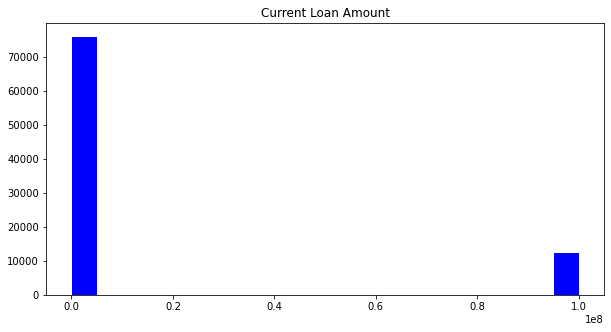

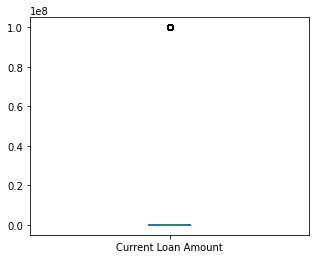

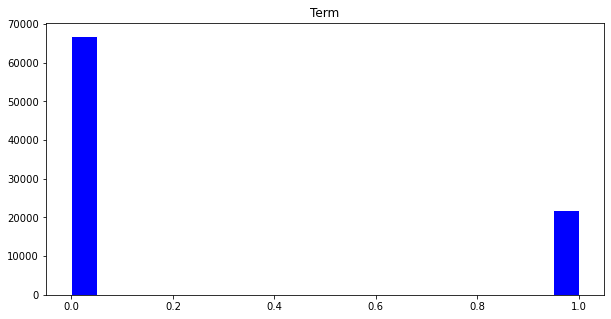

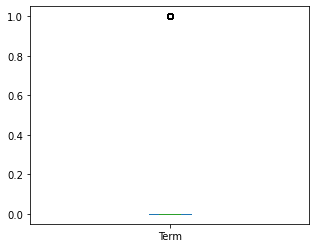

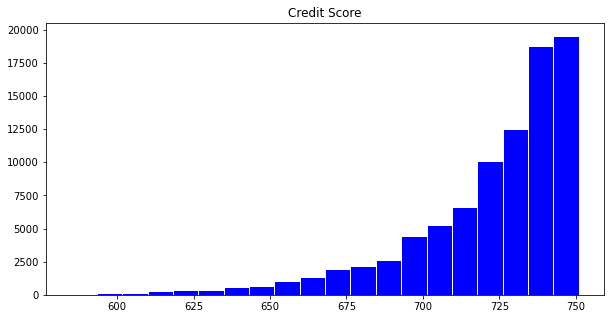

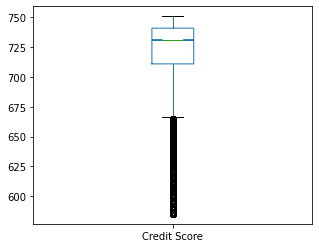

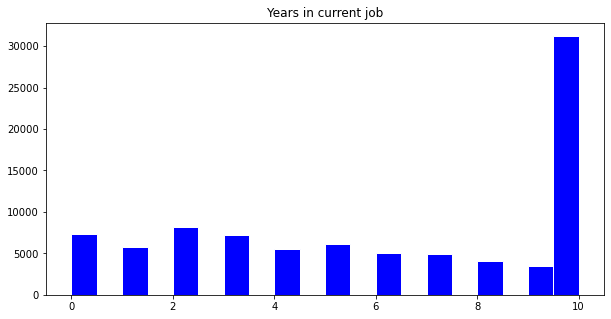

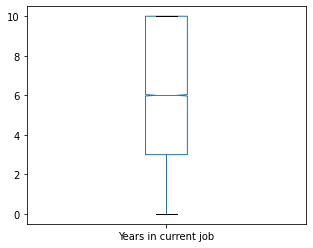

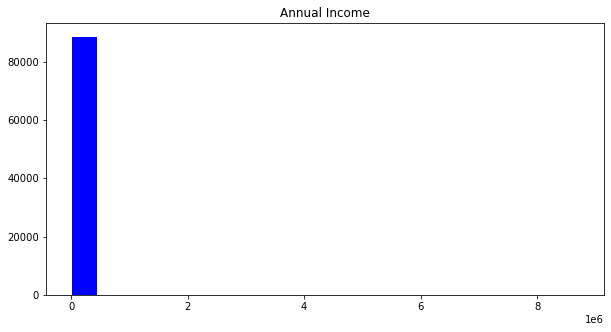

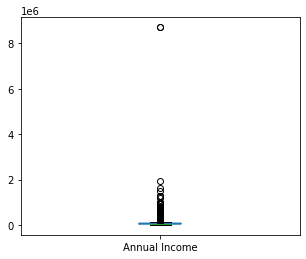

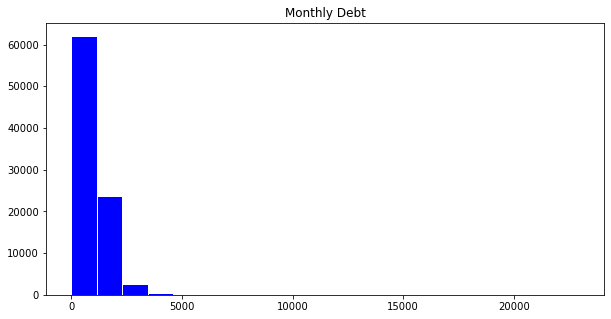

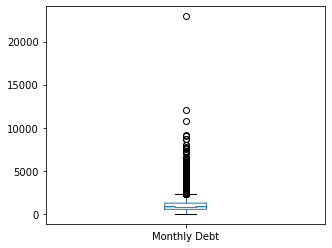

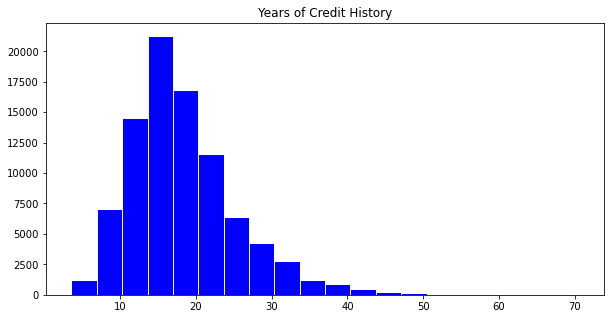

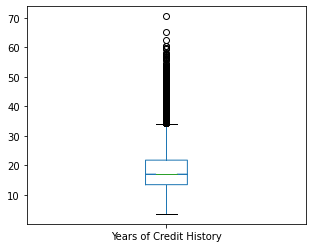

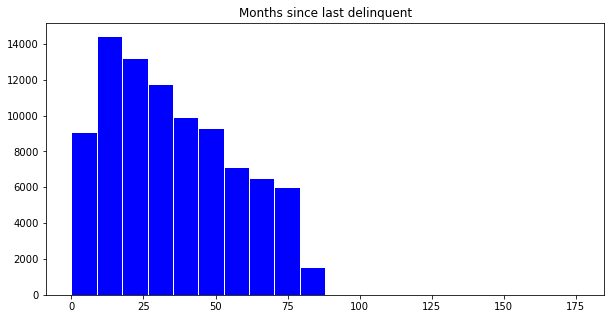

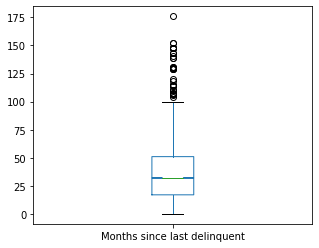

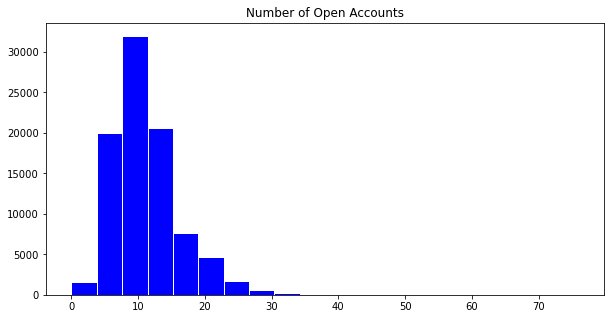

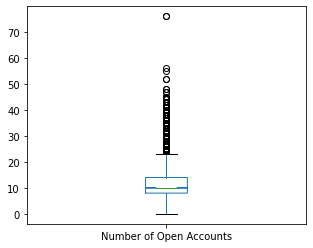

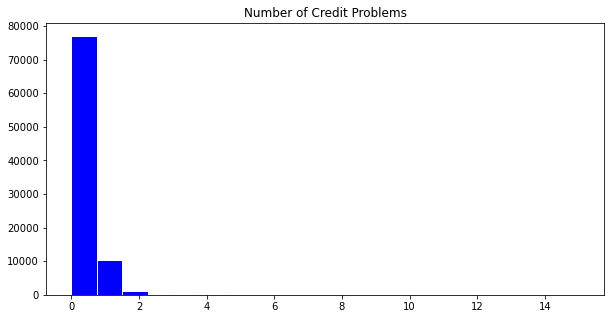

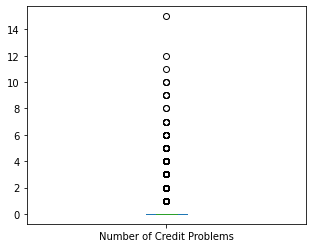

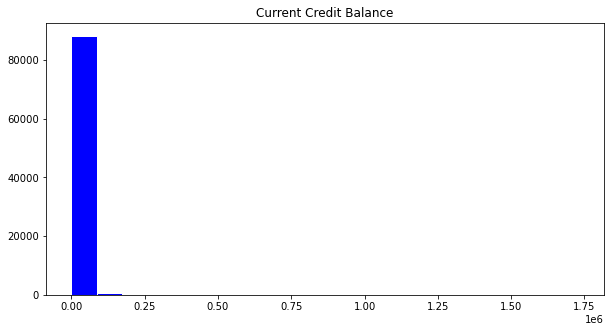

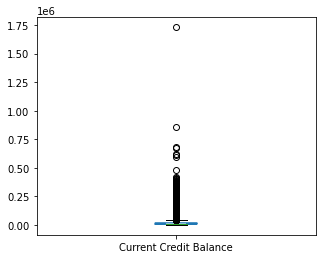

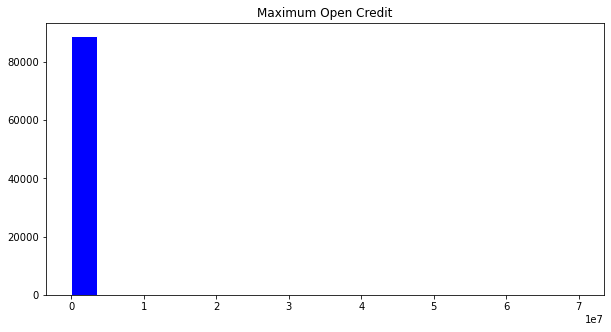

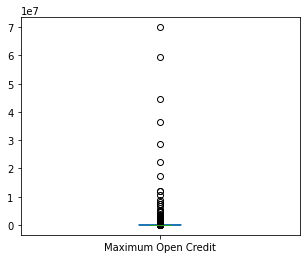

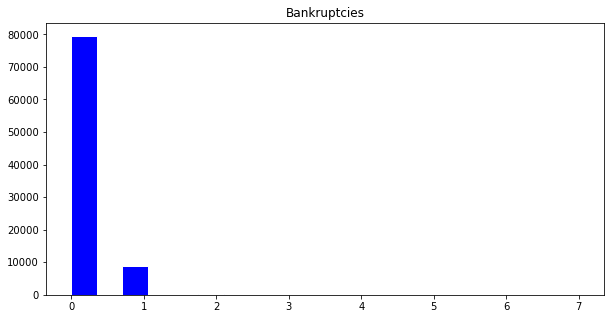

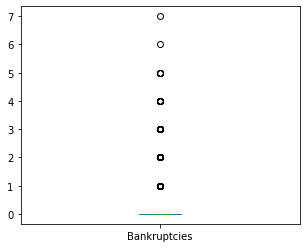

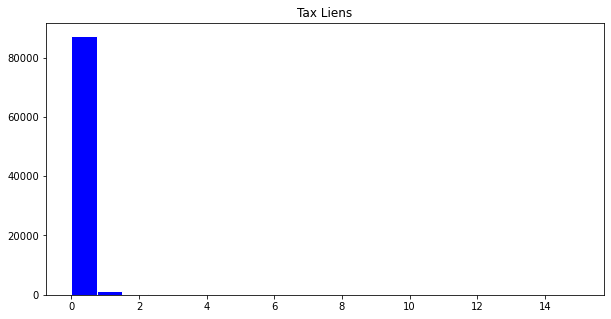

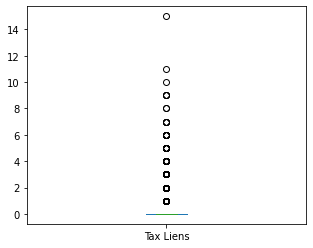

In [587]:
for col in num.columns:
    
    #histogram
    num.hist(column = col,

              grid=False,        #Do not include the grid
              figsize=(10,5),
             color="blue",
             edgecolor="White",
             bins=20)     #(Length,Height) of the plot in inches

    plt.show()

    #boxplot
    num.boxplot(column= col,
                grid= False,
                figsize=(5,4),
                notch=True)

    plt.show()

- Uni-variate Analysis of Categorical Variable

In [588]:
cate = final_imputed_loanData.select_dtypes(include='object')

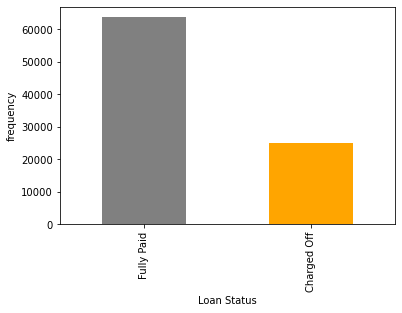

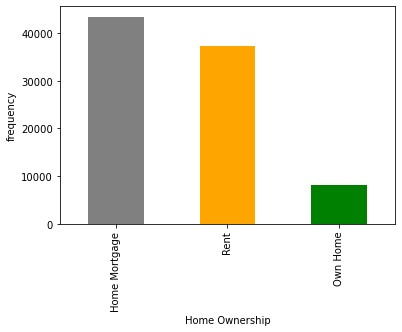

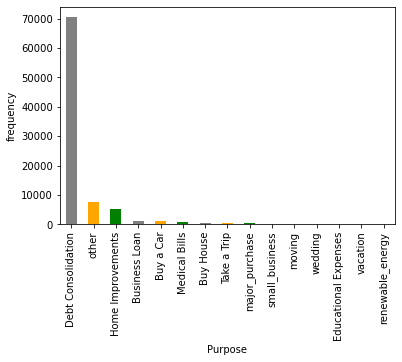

In [589]:
for col in cate.columns:
    #bar_plot
    data[col].value_counts().plot( kind='bar', xlabel=col, ylabel='frequency', color=['Grey','Orange','Green'])
    plt.show()

# Encoding of Categorical Variables

In [590]:
df = final_imputed_loanData.copy()
df

,Loan Status,Home Ownership,Purpose,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,Rent,Debt Consolidation,12232.0,0.0,728.0,0.0,46643.0,777.39,18.0,10.0,12.0,0.0,6762.0,7946.0,0.0,0.0
1,Charged Off,Home Mortgage,Debt Consolidation,25014.0,1.0,733.0,10.0,81099.0,892.09,26.7,3.0,14.0,0.0,35706.0,77961.0,0.0,0.0
2,Charged Off,Home Mortgage,Home Improvements,16117.0,0.0,724.0,9.0,60438.0,1244.02,16.7,32.0,11.0,1.0,11275.0,14815.0,1.0,0.0
3,Charged Off,Rent,Debt Consolidation,11716.0,0.0,740.0,3.0,34171.0,990.94,10.0,22.0,21.0,0.0,7009.0,43533.0,0.0,0.0
4,Charged Off,Home Mortgage,Home Improvements,9789.0,1.0,686.0,10.0,47003.0,503.71,16.7,25.0,13.0,1.0,16913.0,19553.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,Fully Paid,Rent,Debt Consolidation,10136.0,0.0,728.0,10.0,35476.0,567.62,21.2,14.0,14.0,0.0,15914.0,28265.0,0.0,0.0
88906,Fully Paid,Home Mortgage,Debt Consolidation,29610.0,0.0,710.0,10.0,123375.0,2508.63,15.0,16.0,11.0,0.0,17727.0,32766.0,0.0,0.0
88907,Fully Paid,Home Mortgage,Debt Consolidation,24394.0,0.0,746.0,10.0,71148.0,818.20,36.4,9.0,8.0,0.0,44728.0,53374.0,0.0,0.0
88908,Charged Off,Rent,Debt Consolidation,5030.0,0.0,722.0,10.0,25424.0,360.17,19.0,7.0,12.0,0.0,6374.0,18422.0,0.0,0.0


In [591]:
df.head()

,Loan Status,Home Ownership,Purpose,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,Rent,Debt Consolidation,12232.0,0.0,728.0,0.0,46643.0,777.39,18.0,10.0,12.0,0.0,6762.0,7946.0,0.0,0.0
1,Charged Off,Home Mortgage,Debt Consolidation,25014.0,1.0,733.0,10.0,81099.0,892.09,26.7,3.0,14.0,0.0,35706.0,77961.0,0.0,0.0
2,Charged Off,Home Mortgage,Home Improvements,16117.0,0.0,724.0,9.0,60438.0,1244.02,16.7,32.0,11.0,1.0,11275.0,14815.0,1.0,0.0
3,Charged Off,Rent,Debt Consolidation,11716.0,0.0,740.0,3.0,34171.0,990.94,10.0,22.0,21.0,0.0,7009.0,43533.0,0.0,0.0
4,Charged Off,Home Mortgage,Home Improvements,9789.0,1.0,686.0,10.0,47003.0,503.71,16.7,25.0,13.0,1.0,16913.0,19553.0,1.0,0.0


In [592]:
#Mapping 1 to charged Off and 0 to Fully paid
df['Loan Status'] = df['Loan Status'].map({'Charged Off':1,'Fully Paid':0})

In [593]:
df['Loan Status'].value_counts()

0    63737
1    25173
Name: Loan Status, dtype: int64

In [594]:
df.head()

,Loan Status,Home Ownership,Purpose,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,Rent,Debt Consolidation,12232.0,0.0,728.0,0.0,46643.0,777.39,18.0,10.0,12.0,0.0,6762.0,7946.0,0.0,0.0
1,1,Home Mortgage,Debt Consolidation,25014.0,1.0,733.0,10.0,81099.0,892.09,26.7,3.0,14.0,0.0,35706.0,77961.0,0.0,0.0
2,1,Home Mortgage,Home Improvements,16117.0,0.0,724.0,9.0,60438.0,1244.02,16.7,32.0,11.0,1.0,11275.0,14815.0,1.0,0.0
3,1,Rent,Debt Consolidation,11716.0,0.0,740.0,3.0,34171.0,990.94,10.0,22.0,21.0,0.0,7009.0,43533.0,0.0,0.0
4,1,Home Mortgage,Home Improvements,9789.0,1.0,686.0,10.0,47003.0,503.71,16.7,25.0,13.0,1.0,16913.0,19553.0,1.0,0.0


In [595]:
df_iv = df.copy()

### One-Hot Encoding of Categorical Variables

In [596]:
cat = pd.get_dummies(df[['Home Ownership','Purpose']],prefix=['Home Ownership','Purpose']) 

In [597]:
num = df.select_dtypes(exclude='object') #exclude cat variables
num

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,12232.0,0.0,728.0,0.0,46643.0,777.39,18.0,10.0,12.0,0.0,6762.0,7946.0,0.0,0.0
1,1,25014.0,1.0,733.0,10.0,81099.0,892.09,26.7,3.0,14.0,0.0,35706.0,77961.0,0.0,0.0
2,1,16117.0,0.0,724.0,9.0,60438.0,1244.02,16.7,32.0,11.0,1.0,11275.0,14815.0,1.0,0.0
3,1,11716.0,0.0,740.0,3.0,34171.0,990.94,10.0,22.0,21.0,0.0,7009.0,43533.0,0.0,0.0
4,1,9789.0,1.0,686.0,10.0,47003.0,503.71,16.7,25.0,13.0,1.0,16913.0,19553.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,0,10136.0,0.0,728.0,10.0,35476.0,567.62,21.2,14.0,14.0,0.0,15914.0,28265.0,0.0,0.0
88906,0,29610.0,0.0,710.0,10.0,123375.0,2508.63,15.0,16.0,11.0,0.0,17727.0,32766.0,0.0,0.0
88907,0,24394.0,0.0,746.0,10.0,71148.0,818.20,36.4,9.0,8.0,0.0,44728.0,53374.0,0.0,0.0
88908,1,5030.0,0.0,722.0,10.0,25424.0,360.17,19.0,7.0,12.0,0.0,6374.0,18422.0,0.0,0.0


In [598]:
join= [num,cat] 
df = pd.concat(join,axis=1,join='inner')  #combing the one hot encoded categorical variable to rest of the predictors
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Years in current job', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Business Loan', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_other',
       'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding'],
      dtype='object')

In [599]:
X = df.drop(["Loan Status"],axis=1)  #predictors, dropping house column (Target) to drop column axis=1
y = df["Loan Status"]
X.head()

,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,12232.0,0.0,728.0,0.0,46643.0,777.39,18.0,10.0,12.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,25014.0,1.0,733.0,10.0,81099.0,892.09,26.7,3.0,14.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,16117.0,0.0,724.0,9.0,60438.0,1244.02,16.7,32.0,11.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,11716.0,0.0,740.0,3.0,34171.0,990.94,10.0,22.0,21.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,9789.0,1.0,686.0,10.0,47003.0,503.71,16.7,25.0,13.0,1.0,...,1,0,0,0,0,0,0,0,0,0


# Train-Validation-Test Split

In [600]:
#For train-test split
from sklearn.model_selection import train_test_split   #import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)  # X-predictors, y-target

#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20)

In [601]:
X_valid_rf = X_valid.copy()
X_valid_iv = X_valid.copy()

# Import Libraraies

In [602]:
#import LogisticRegression from Sklearn
from sklearn.linear_model import LogisticRegression
import sklearn.ensemble as ensemble #import ensemble for bagging
from sklearn.ensemble import RandomForestClassifier #import randomforest Classifier
from sklearn.ensemble import AdaBoostClassifier #import adaboostclassifer
from sklearn.tree import DecisionTreeClassifier #import Decision tree
#Area under ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report #import Scoring metric

## MODEL1: BaseLine Model - using all variables on class imbalanced data

> **a) Logistic Regression**

In [603]:
#Fitting Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train,y_train)

#predictions on validation data
pred_valid = lr.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

lm1 = pd.DataFrame({'Logistic_Model_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

print(classification_report(y_valid,pred_valid))
lm1

              precision    recall  f1-score   support

           0       0.71      1.00      0.83     11400
           1       0.45      0.00      0.00      4604

    accuracy                           0.71     16004
   macro avg       0.58      0.50      0.42     16004
weighted avg       0.64      0.71      0.59     16004



,Logistic_Model_1
Accuracy,0.712197
F1_score,0.004323
Recall,0.002172
AUROC,0.500560


In [604]:
y_valid.value_counts()

0    11400
1     4604
Name: Loan Status, dtype: int64

In [605]:
pd.DataFrame(pred_valid).value_counts()

0    15982
1       22
dtype: int64

> **b) Decision Tree**

In [606]:
#Fitting Decision tree Model
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)
pred = dt.predict(X_valid)

#predictions on validation data
pred_valid = dt.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

dt1 = pd.DataFrame({'Decision_Tree_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

print(classification_report(y_valid,pred_valid))
dt1

              precision    recall  f1-score   support

           0       0.75      0.93      0.83     11400
           1       0.59      0.23      0.33      4604

    accuracy                           0.73     16004
   macro avg       0.67      0.58      0.58     16004
weighted avg       0.70      0.73      0.69     16004



,Decision_Tree_1
Accuracy,0.732754
F1_score,0.334319
Recall,0.233275
AUROC,0.583875


> **c) Pruned Decision Tree**

In [607]:
# #pruning-Finding alpha
# path = dt.cost_complexity_pruning_path(X_train, y_train)
# ccp_alphas = path.ccp_alphas
# ccp_alphas

# train_accuracy = {}         #Dictionary to store alpha and mae
# validation_accuracy = {}

# for i in ccp_alphas:
#     dt = DecisionTreeClassifier(ccp_alpha=i)
#     dt.fit(X_train,y_train)
#     pred_valid = dt.predict(X_valid)
#     pred_train = dt.predict(X_train)

#     train_accuracy[i] = accuracy_score(y_train,pred_train)
#     validation_accuracy[i] = accuracy_score(y_valid,pred_valid)

# opt_ccp = max(validation_accuracy,key = validation_accuracy.get) #Optimum Cost Complexity Parameter
# opt_ccp #optimal CCP_alphas 

In [608]:
# #Fitting pruned decision tree model using optimum alpha
# prun_dt = DecisionTreeClassifier(ccp_alpha=opt_ccp) 

# prun_dt.fit(X_train,y_train)
# pred = prun_dt.predict(X_valid)

# #predictions on validation data
# pred_valid = prun_dt.predict(X_valid)   
# pred_valid

# #Metrics
# Accuracy = accuracy_score(y_valid, pred_valid)
# F1_score = f1_score(y_valid, pred_valid)
# Recall_score = recall_score(y_valid, pred_valid)
# AUROC = roc_auc_score(y_valid, pred_valid)

# pdt1 = pd.DataFrame({'Pruned_Decision_Tree_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
#                                 index=['Accuracy','F1_score','Recall','AUROC'])

# #print(classification_report(y_valid,pred_valid))
# pdt1

> **d) Random Forest**

In [609]:
#Fitting Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train) 
pred = rf.predict(X_valid)

#predictions on validation data
pred_valid = rf.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

rf1 = pd.DataFrame({'Random_Forest_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
rf1

,Random_Forest_1
Accuracy,0.758185
F1_score,0.431384
Recall,0.318853
AUROC,0.627234


> **e) Adaboost**

In [610]:
#Fitting Adaboost Model
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) 
pred = ada_boost.predict(X_valid)

#predictions on validation data
pred_valid = ada_boost.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

adb1 = pd.DataFrame({'Adaboost_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
adb1

,Adaboost_1
Accuracy,0.738440
F1_score,0.385316
Recall,0.284970
AUROC,0.603274


--------------------------------------------------------------------------------------------------------------------------------

## MODEL2: Model on Class-Balanced data using SMOTE

In [611]:
#pip install imblearn

In [612]:
#import SMOTE module from imblearn library
#pip install imblearn #(if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [613]:
y_train.value_counts() #Class imbalanced data

0    45983
1    18032
Name: Loan Status, dtype: int64

In [614]:
y_train = pd.DataFrame(y_train_res)
X_train = pd.DataFrame(X_train_res)

In [615]:
y_train.value_counts() #Oversampling using smote balanced the class

0    45983
1    45983
dtype: int64

In [616]:
X_train_iv = X_train.copy()
y_train_iv = y_train.copy()

In [617]:
X_train_rf = X_train.copy()
y_train_rf = y_train.copy()

> **a) Logistic Regression**

In [618]:
#Fitting Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train,y_train)

#predictions on validation data
pred_valid = lr.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

lm2 = pd.DataFrame({'Logistic_Model_2': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

print(classification_report(y_valid,pred_valid))
lm2

              precision    recall  f1-score   support

           0       0.89      0.35      0.50     11400
           1       0.36      0.89      0.51      4604

    accuracy                           0.51     16004
   macro avg       0.62      0.62      0.51     16004
weighted avg       0.73      0.51      0.50     16004



,Logistic_Model_2
Accuracy,0.505374
F1_score,0.507834
Recall,0.887055
AUROC,0.619141


> **b) Decision Tree**

In [619]:
#Fitting Decision tree Model
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)
pred = dt.predict(X_valid)

#predictions on validation data
pred_valid = dt.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

dt2 = pd.DataFrame({'Decision_Tree_2': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
dt2

,Decision_Tree_2
Accuracy,0.707261
F1_score,0.490262
Recall,0.489357
AUROC,0.642310


> **c) Pruned Decision Tree**

In [620]:
# #pruning-Finding alpha
# path = dt.cost_complexity_pruning_path(X_train, y_train)
# ccp_alphas = path.ccp_alphas
# ccp_alphas

# train_accuracy = {}         #Dictionary to store alpha and mae
# validation_accuracy = {}

# for i in ccp_alphas:
#     dt = DecisionTreeClassifier(ccp_alpha=i)
#     dt.fit(X_train,y_train)
#     pred_valid = dt.predict(X_valid)
#     pred_train = dt.predict(X_train)

#     train_accuracy[i] = accuracy_score(y_train,pred_train)
#     validation_accuracy[i] = accuracy_score(y_valid,pred_valid)

# opt_ccp = max(validation_accuracy,key = validation_accuracy.get) #Optimum Cost Complexity Parameter
# opt_ccp #optimal CCP_alphas 

In [621]:
# #Fitting pruned decision tree model using optimum alpha
# prun_dt = DecisionTreeClassifier(ccp_alpha=opt_ccp) 

# prun_dt.fit(X_train,y_train)
# pred = prun_dt.predict(X_valid)

# #predictions on validation data
# pred_valid = prun_dt.predict(X_valid)   
# pred_valid

# #Metrics
# Accuracy = accuracy_score(y_valid, pred_valid)
# F1_score = f1_score(y_valid, pred_valid)
# Recall_score = recall_score(y_valid, pred_valid)
# AUROC = roc_auc_score(y_valid, pred_valid)

# pdt2 = pd.DataFrame({'Pruned_Decision_Tree_2': [Accuracy,F1_score,Recall_score,AUROC]}, 
#                                 index=['Accuracy','F1_score','Recall','AUROC'])

# #print(classification_report(y_valid,pred_valid))
# pdt2

> **d) Random Forest**

In [622]:
#Fitting Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train) 
pred = rf.predict(X_valid)

#predictions on validation data
pred_valid = rf.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

rf2 = pd.DataFrame({'Random_Forest_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
rf2

,Random_Forest_1
Accuracy,0.762122
F1_score,0.516326
Recall,0.441355
AUROC,0.666511


> **e) Adaboost**

In [623]:
#Fitting Adaboost Model
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) 
pred = ada_boost.predict(X_valid)

#predictions on validation data
pred_valid = ada_boost.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

adb2 = pd.DataFrame({'Adaboost_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
adb2

,Adaboost_1
Accuracy,0.701512
F1_score,0.483400
Recall,0.485447
AUROC,0.637110


## MODEL5: Feature Selection using Information Value 



- Fitting Logistic regression model using columns that have IV of 0.03 or higher

https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

In [624]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

### IV 

In [625]:
df_iv = df.copy()

In [626]:
iv = iv_woe(df_iv,"Loan Status",bins=10,show_woe=False)

Information value of Current Loan Amount is 0.246993
Information value of Term is 0.143059
Information value of Credit Score is 0.395366
Information value of Years in current job is 0.00088
Information value of Annual Income is 0.055386
Information value of Monthly Debt is 0.004171
Information value of Years of Credit History is 0.012882
Information value of Months since last delinquent is 0.005486
Information value of Number of Open Accounts is 0.001901
Information value of Number of Credit Problems is 0.000516
Information value of Current Credit Balance is 0.003387
Information value of Maximum Open Credit is 0.024512
Information value of Bankruptcies is 6.4e-05
Information value of Tax Liens is 0.0
Information value of Home Ownership_Home Mortgage is 0.018728
Information value of Home Ownership_Own Home is 9.5e-05
Information value of Home Ownership_Rent is 0.017467
Information value of Purpose_Business Loan is 0.004681
Information value of Purpose_Buy House is 0.0
Information value 

In [627]:
iv = iv[0]

In [628]:
# Seggregating the variables based on IV value
preffered=[]
medium=[]
rejected=[]

for i in range(len(iv)):
    if (iv.iloc[i,1])>0.1:
        preffered.append(iv.iloc[i,0])
        
    if  (iv.iloc[i,1])<0.1 and  (iv.iloc[i,1])>0.03:
        medium.append(iv.iloc[i,0])
        
    if (iv.iloc[i,1])<0.03:
        rejected.append(iv.iloc[i,0])       

In [629]:
preffered

['Current Loan Amount', 'Term', 'Credit Score']

In [630]:
medium

['Annual Income']

In [631]:
#rejected

In [632]:
X_train_iv.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Years in current job',
       'Annual Income', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Business Loan', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_other',
       'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding'],
      dtype='object')

In [633]:
X_train_iv = X_train_iv[['Current Loan Amount','Term', 'Credit Score','Annual Income']]
X_train = X_train_iv.copy()
X_valid_iv = X_valid_iv[['Current Loan Amount','Term', 'Credit Score','Annual Income']]
X_valid = X_valid_iv.copy()

> **a) Logistic Regression**

In [634]:
#Fitting Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train,y_train)

#predictions on validation data
pred_valid = lr.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

lm1 = pd.DataFrame({'Logistic_Model_l': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

print(classification_report(y_valid,pred_valid))
lm1

              precision    recall  f1-score   support

           0       0.92      0.27      0.41     11400
           1       0.34      0.94      0.50      4604

    accuracy                           0.46     16004
   macro avg       0.63      0.60      0.46     16004
weighted avg       0.75      0.46      0.44     16004



,Logistic_Model_l
Accuracy,0.460072
F1_score,0.500665
Recall,0.940921
AUROC,0.603399


> **b) Decision Tree**

In [635]:
#Fitting Decision tree Model
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)


#predictions on validation data
pred_valid = dt.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

dt1 = pd.DataFrame({'Decision_Tree_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid1,pred_valid))
dt1

,Decision_Tree_1
Accuracy,0.686641
F1_score,0.545125
Recall,0.652693
AUROC,0.676522


> **c) Pruned Decision Tree**

In [636]:
# #pruning-Finding alpha
# path = dt.cost_complexity_pruning_path(X_train1, y_train1)
# ccp_alphas = path.ccp_alphas
# ccp_alphas

# train_accuracy = {}         #Dictionary to store alpha and mae
# validation_accuracy = {}

# for i in ccp_alphas:
#     dt = DecisionTreeClassifier(ccp_alpha=i)
#     dt.fit(X_train1,y_train1)
#     pred_valid = dt.predict(X_valid1)
#     pred_train = dt.predict(X_train1)

#     train_accuracy[i] = accuracy_score(y_train1,pred_train)
#     validation_accuracy[i] = accuracy_score(y_valid1,pred_valid)

# opt_ccp = max(validation_accuracy,key = validation_accuracy.get) #Optimum Cost Complexity Parameter
# opt_ccp #optimal CCP_alphas 

In [637]:
# #Fitting pruned decision tree model using optimum alpha
# prun_dt = DecisionTreeClassifier(ccp_alpha=opt_ccp) 

# prun_dt.fit(X_train1,y_train1)
# pred = prun_dt.predict(X_valid1)

# #predictions on validation data
# pred_valid = prun_dt.predict(X_valid1)   
# pred_valid

# #Metrics
# Accuracy = accuracy_score(y_valid1, pred_valid)
# F1_score = f1_score(y_valid1, pred_valid)
# Recall_score = recall_score(y_valid1, pred_valid)
# AUROC = roc_auc_score(y_valid1, pred_valid)

# pdt1 = pd.DataFrame({'Pruned_Decision_Tree_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
#                                 index=['Accuracy','F1_score','Recall','AUROC'])

# #print(classification_report(y_valid1,pred_valid))
# pdt1

> **d) Random Forest**

In [638]:
#Fitting Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train) 


#predictions on validation data
pred_valid = rf.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

rf1 = pd.DataFrame({'Random_Forest_l': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid1,pred_valid))
rf1

,Random_Forest_l
Accuracy,0.713509
F1_score,0.518938
Recall,0.537142
AUROC,0.660939


> **e) Adaboost**

In [639]:
#Fitting Adaboost Model
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) 

#predictions on validation data
pred_valid = ada_boost.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

adb1 = pd.DataFrame({'Adaboost_l': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
adb1

,Adaboost_l
Accuracy,0.686078
F1_score,0.551909
Recall,0.672024
AUROC,0.681889


> **f) XG Boost**

In [640]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
pred_valid = model.predict(X_valid)

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

xg = pd.DataFrame({'Xgboost_l': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
xg

,Xgboost_l
Accuracy,0.729693
F1_score,0.496977
Recall,0.464162
AUROC,0.650546


# Feature Selection Using Random forest

https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

In [641]:
from sklearn.feature_selection import SelectFromModel

In [642]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 50))
sel.fit(X_train_rf, y_train_rf)
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [643]:
selected_feat= X_train_rf.columns[(sel.get_support())]
len(selected_feat)

13

In [644]:
print(selected_feat)

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Years in current job',
       'Annual Income', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Current Credit Balance', 'Maximum Open Credit',
       'Home Ownership_Home Mortgage', 'Home Ownership_Rent'],
      dtype='object')


In [645]:
X_train_rf

,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,11484.000000,0.000000,732.000000,4.000000,42126.000000,595.920000,44.600000,6.000000,11.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
1,24697.000000,1.000000,646.000000,5.000000,56352.000000,1108.260000,15.000000,27.000000,18.000000,0.000000,...,0,1,0,0,0,0,0,0,0,0
2,21558.000000,1.000000,705.000000,10.000000,143065.000000,1204.130000,18.500000,79.000000,13.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,27012.000000,0.000000,735.000000,10.000000,112873.000000,4096.970000,37.800000,53.000000,34.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,21875.000000,0.000000,747.000000,8.000000,119316.000000,746.720000,16.000000,2.000000,6.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91961,11490.574378,0.655056,703.696641,4.759552,72449.783189,1363.381867,17.151910,46.101120,11.034832,1.310112,...,0,0,0,0,0,0,0,0,0,0
91962,6596.301402,0.404361,730.256687,5.234884,58910.568691,961.109309,13.675321,32.912789,10.786918,0.000000,...,0,0,0,0,0,0,0,0,0,0
91963,16876.916023,1.000000,722.256833,10.000000,47634.903723,998.313896,21.599779,38.787983,11.548633,0.000000,...,0,0,0,0,0,0,0,0,0,0
91964,34803.335373,0.148181,728.553710,10.000000,95849.099453,1406.581389,14.533800,25.480931,18.407278,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [646]:
X_train_rf = X_train_rf[['Current Loan Amount', 'Term', 'Credit Score', 'Years in current job',
                           'Annual Income', 'Monthly Debt', 'Years of Credit History',
                           'Months since last delinquent', 'Number of Open Accounts',
                           'Current Credit Balance', 'Maximum Open Credit']]
X_valid_rf = X_valid_rf[['Current Loan Amount', 'Term', 'Credit Score', 'Years in current job',
                           'Annual Income', 'Monthly Debt', 'Years of Credit History',
                           'Months since last delinquent', 'Number of Open Accounts',
                            'Current Credit Balance', 'Maximum Open Credit']]

In [647]:
#Fitting Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train_rf,y_train_rf)

#predictions on validation data
pred_valid = lr.predict(X_valid_rf)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

lm1 = pd.DataFrame({'Logistic_Model': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
lm1

,Logistic_Model
Accuracy,0.505374
F1_score,0.507834
Recall,0.887055
AUROC,0.619141


> **b) Decision Tree**

In [648]:
#Fitting Decision tree Model
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train_rf,y_train_rf)


#predictions on validation data
pred_valid = dt.predict(X_valid_rf)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

dt1 = pd.DataFrame({'Decision_Tree': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
dt1

,Decision_Tree
Accuracy,0.666833
F1_score,0.520158
Recall,0.627715
AUROC,0.655173


> **c) Pruned Decision Tree**

In [649]:
# #pruning-Finding alpha
# path = dt.cost_complexity_pruning_path(X_train1CB, y_train1CB)
# ccp_alphas = path.ccp_alphas
# ccp_alphas

# train_accuracy = {}         #Dictionary to store alpha and mae
# validation_accuracy = {}

# for i in ccp_alphas:
#     dt = DecisionTreeClassifier(ccp_alpha=i)
#     dt.fit(X_train1CB,y_train1CB)
#     pred_valid = dt.predict(X_valid1)
#     pred_train = dt.predict(X_train1CB)

#     train_accuracy[i] = accuracy_score(y_train1CB,pred_train)
#     validation_accuracy[i] = accuracy_score(y_valid1,pred_valid)

# opt_ccp = max(validation_accuracy,key = validation_accuracy.get) #Optimum Cost Complexity Parameter
# opt_ccp #optimal CCP_alphas 

In [650]:
# #Fitting pruned decision tree model using optimum alpha
# prun_dt = DecisionTreeClassifier(ccp_alpha=opt_ccp) 

# prun_dt.fit(X_train1CB,y_train1CB)

# #predictions on validation data
# pred_valid = prun_dt.predict(X_valid1)   
# pred_valid

# #Metrics
# Accuracy = accuracy_score(y_valid1, pred_valid)
# F1_score = f1_score(y_valid1, pred_valid)
# Recall_score = recall_score(y_valid1, pred_valid)
# AUROC = roc_auc_score(y_valid1, pred_valid)

# pdt1 = pd.DataFrame({'Pruned_Decision_Tree_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
#                                 index=['Accuracy','F1_score','Recall','AUROC'])

# #print(classification_report(y_validCB,pred_valid))
# pdt1

> **d) Random Forest**

In [651]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# import time

### Hyper-Parameter Tuning

In [652]:
# n_estimators = [100, 300, 500, 800, 1200]
# max_depth = [5, 8, 15, 25, 30]
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10] 
# rf = RandomForestClassifier()
# hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf)

# gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
#                       n_jobs = -1)
# bestF = gridF.fit(X_train1CB, y_train1CB)
# bestF

In [653]:
#Fitting Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train_rf,y_train_rf) 

#predictions on validation data
pred_valid = rf.predict(X_valid_rf)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

rf1 = pd.DataFrame({'Random_Forest': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
rf1

,Random_Forest
Accuracy,0.740252
F1_score,0.516572
Recall,0.482407
AUROC,0.663396


> **e) Adaboost**

In [654]:
#Fitting Adaboost Model
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train_rf,y_train_rf) 


#predictions on validation data
pred_valid = ada_boost.predict(X_valid_rf)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

adb1 = pd.DataFrame({'Adaboost': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
adb1

,Adaboost
Accuracy,0.673144
F1_score,0.520400
Recall,0.616421
AUROC,0.656237


> **f) XG Boost**

In [655]:
#pip install xgboost

In [656]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train_rf,y_train_rf)
# make predictions for test data
pred_valid = xg.predict(X_valid_rf)

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

xg1 = pd.DataFrame({'Xgboost': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
xg1

,Xgboost
Accuracy,0.735504
F1_score,0.447173
Recall,0.371851
AUROC,0.627109


> **g) k-NN Classifier**

In [657]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_rf,y_train_rf)
# make predictions for test data
pred_valid = knn.predict(X_valid_rf)

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

knn = pd.DataFrame({'k-NN': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
knn

,k-NN
Accuracy,0.596163
F1_score,0.512042
Recall,0.736533
AUROC,0.638004


--------------------------------------------------------------------------------------------------------------------------------